In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shivamb/netflix-shows


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 141MB/s]


In [ ]:
!unzip netflix-shows.zip


Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [ ]:
df.drop(columns=['show_id','title', 'director', 'cast', 'description'], inplace=True)

In [ ]:
df.rename(columns={'listed_in' : 'genre'}, inplace=True)

In [ ]:
df.head()

,type,country,date_added,release_year,rating,duration,genre
7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
12,Movie,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
24,Movie,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [ ]:
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1
df.head()

,type,country,date_added,release_year,rating,duration,genre
1,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
2,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
3,Movie,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
4,Movie,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
5,Movie,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [ ]:
df.shape

(5332, 7)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].head()

,date_added
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-23
5,2021-09-21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 1 to 5332
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          5332 non-null   object        
 1   country       5332 non-null   object        
 2   date_added    5328 non-null   datetime64[ns]
 3   release_year  5332 non-null   int64         
 4   rating        5332 non-null   object        
 5   duration      5332 non-null   object        
 6   genre         5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 291.7+ KB


In [ ]:
counts = df['type'].value_counts()
percentage = df['type'].value_counts(normalize=True) * 100

distribution_by_type = pd.DataFrame({
    'Type': counts.index,
    'Count': counts.values,
    'Percentage': percentage.values
})

distribution_by_type

,Type,Count,Percentage
0,Movie,5185,97.243061
1,TV Show,147,2.756939


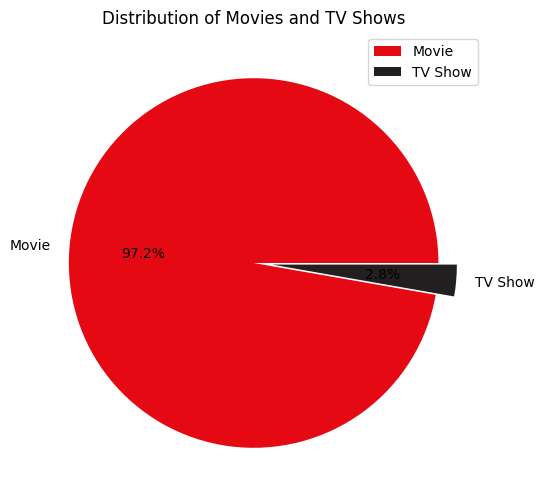

In [ ]:
colors = ['#E50914', '#221F20']

plt.figure(figsize=(10, 6))
plt.pie(
    distribution_by_type['Percentage'],
    labels=distribution_by_type['Type'],
    autopct='%1.1f%%',
    explode=[0, 0.1],
    colors=colors
)
plt.title('Distribution of Movies and TV Shows')
plt.legend()
plt.show()

In [ ]:
top_10_genre_movie = df['genre'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_genre_movie.columns = ['Genre', 'Count']
top_10_genre_movie.index = range(1, len(top_10_genre_movie) + 1)
top_10_genre_movie

,Genre,Count
1,"Dramas, International Movies",336
2,Stand-Up Comedy,286
3,"Comedies, Dramas, International Movies",257
4,"Dramas, Independent Movies, International Movies",243
5,"Children & Family Movies, Comedies",179
6,"Dramas, International Movies, Romantic Movies",160
7,Documentaries,156
8,"Comedies, International Movies",152
9,"Comedies, International Movies, Romantic Movies",143
10,Dramas,133


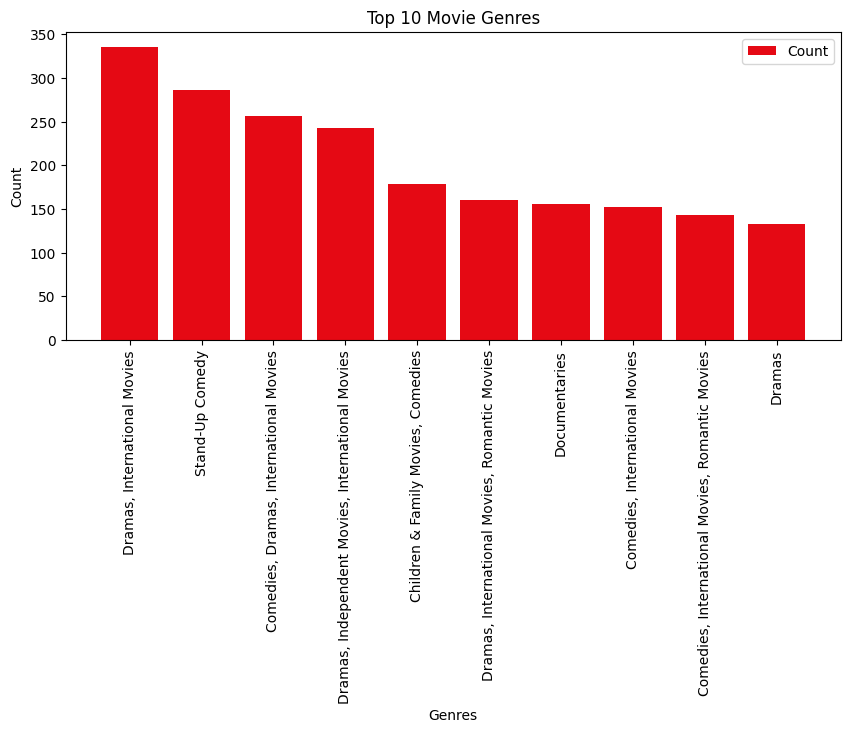

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(top_10_genre_movie['Genre'], top_10_genre_movie['Count'], color='#E50914', label='Count')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
rating_movie = df['rating'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
rating_movie.index = range(1, len(rating_movie) + 1)
rating_movie

,rating,count
1,TV-MA,1741
2,TV-14,1177
3,R,778
4,PG-13,470
5,TV-PG,416
6,PG,275
7,TV-G,81
8,TV-Y,71
9,TV-Y7,70
10,NR,58


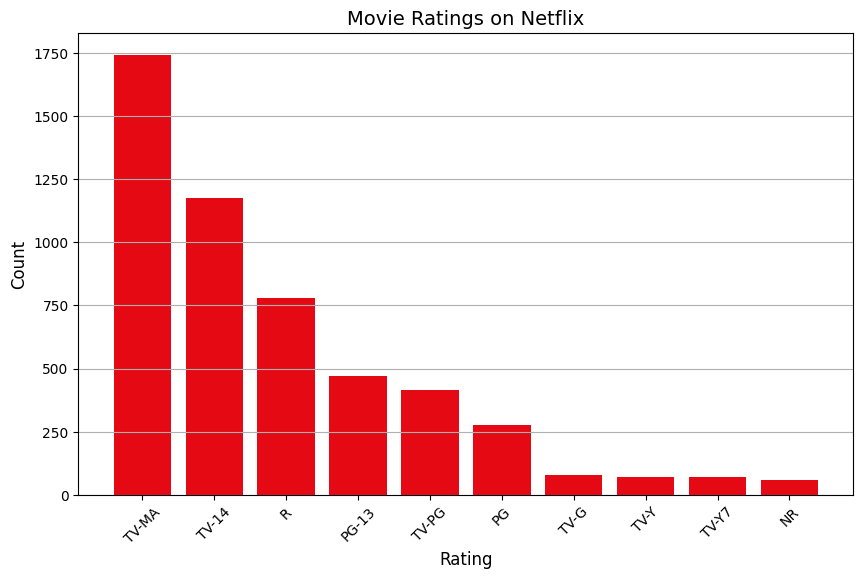

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rating_movie['rating'], rating_movie['count'], color='#E50914')
plt.title('Movie Ratings on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
top_10_genre_tvshow = df['genre'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_genre_tvshow.columns = ['Genre', 'Count']
top_10_genre_tvshow.index = range(1, len(top_10_genre_tvshow) + 1)
top_10_genre_tvshow

,Genre,Count
1,"Crime TV Shows, International TV Shows, TV Dramas",17
2,"International TV Shows, TV Dramas",6
3,"International TV Shows, Romantic TV Shows, TV ...",6
4,"Stand-Up Comedy & Talk Shows, TV Comedies",6
5,"Anime Series, International TV Shows",5
6,"Kids' TV, TV Comedies",5
7,"International TV Shows, Korean TV Shows, Roman...",5
8,TV Shows,5
9,"Crime TV Shows, International TV Shows, Spanis...",4
10,Kids' TV,4


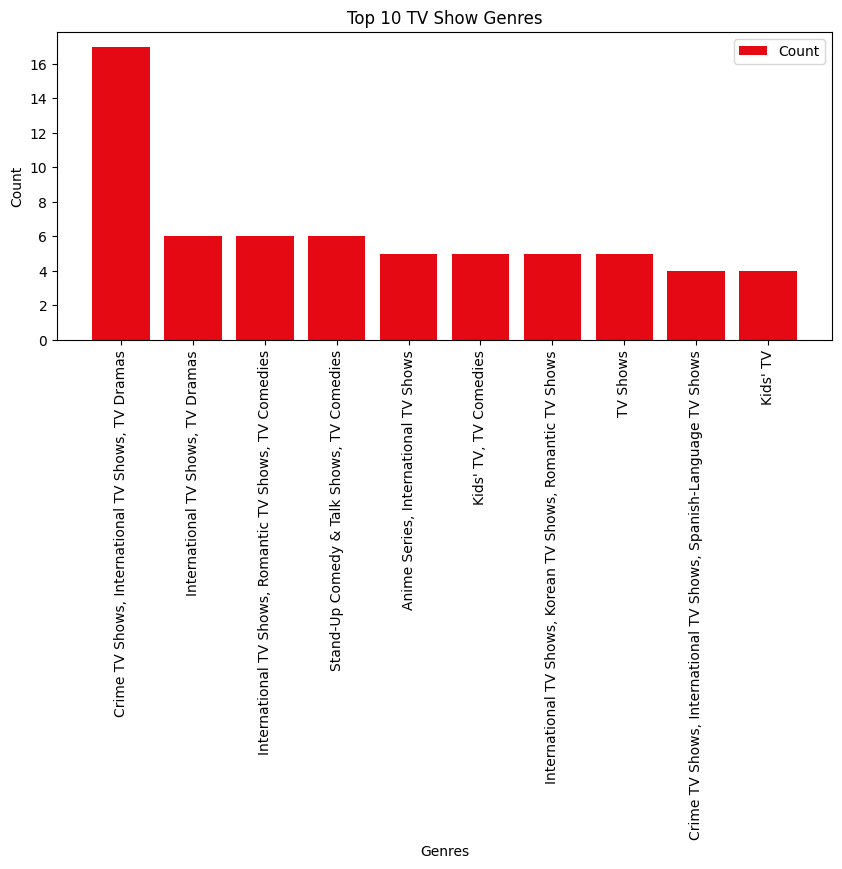

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(top_10_genre_tvshow['Genre'], top_10_genre_tvshow['Count'], color='#E50914', label='Count')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
rating_tvshow = df['rating'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
rating_tvshow.index = range(1, len(rating_tvshow) + 1)
rating_tvshow

,rating,count
1,TV-MA,81
2,TV-14,37
3,TV-PG,15
4,TV-Y7,6
5,TV-Y,5
6,TV-G,3


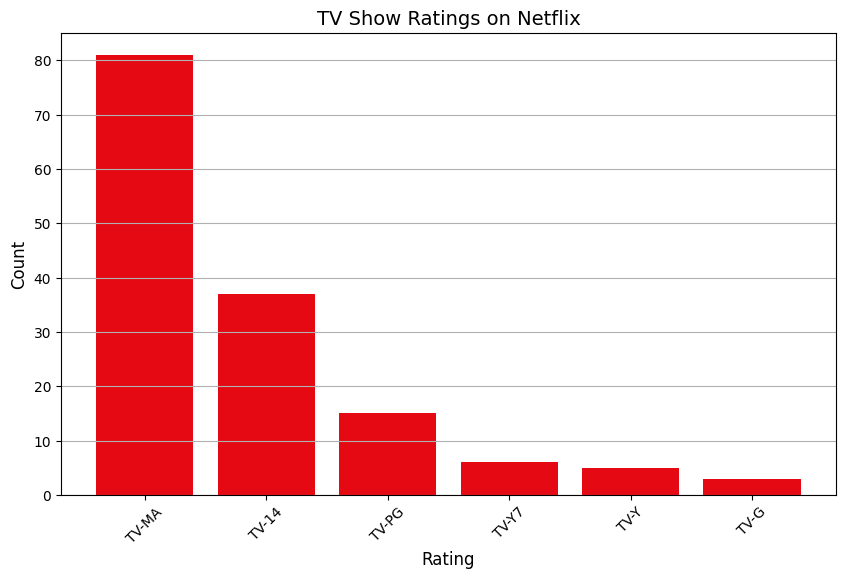

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(rating_tvshow['rating'], rating_tvshow['count'], color='#E50914')
plt.title('TV Show Ratings on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
top_10_countries_movie = df['country'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_movie.index = range(1, len(top_10_countries_movie) + 1)
top_10_countries_movie

,country,count
1,United States,1819
2,India,868
3,United Kingdom,164
4,Canada,104
5,Egypt,90
6,Nigeria,84
7,Spain,84
8,Indonesia,76
9,Turkey,74
10,Japan,73


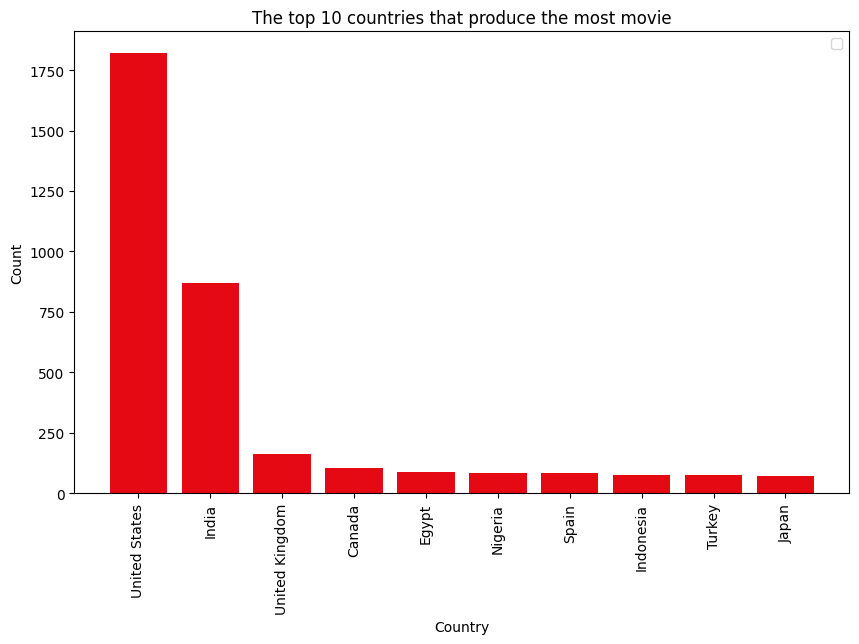

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_movie['country'], top_10_countries_movie['count'], color='#E50914')
plt.title('The top 10 countries that produce the most movie')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
top_10_countries_tvshow = df['country'][df['type'] == 'TV Show'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_10_countries_tvshow.index = range(1, len(top_10_countries_tvshow) + 1)
top_10_countries_tvshow


,country,count
1,United States,27
2,United Kingdom,19
3,Japan,10
4,South Korea,10
5,Spain,7
6,India,7
7,Taiwan,7
8,France,5
9,Turkey,5
10,Thailand,5


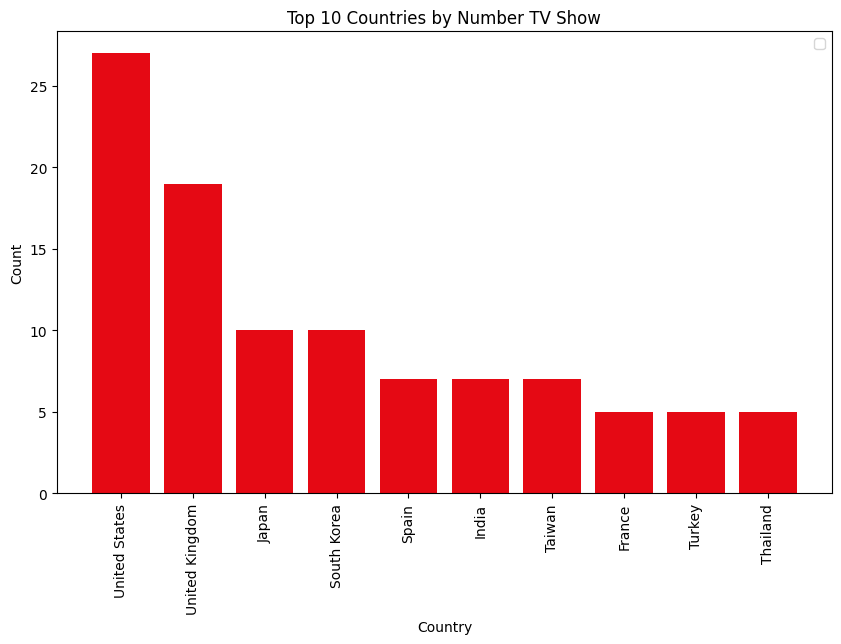

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_tvshow['country'], top_10_countries_tvshow['count'], color='#E50914')
plt.title('Top 10 Countries by Number TV Show')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

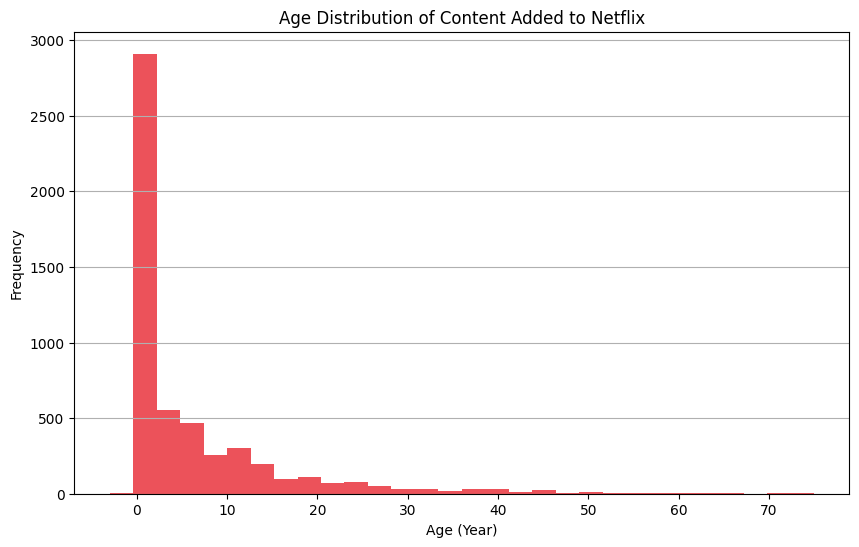

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['content_age'].dropna(), bins=30, color='#E50914', alpha=0.7)
plt.title('Age Distribution of Content Added to Netflix')
plt.xlabel('Age (Year)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
df_movies = df[df['type'] == 'Movie']
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'], errors='coerce')
df_movies['year_added'] = df_movies['date_added'].dt.year

fig = px.histogram(df_movies, x='year_added',
                   template="plotly_white",
                   color_discrete_sequence=['#E50914'],
                   width=800, height=500,
                   text_auto=True,
                   title='Number of Movies Added to Netflix by Year')

fig.show()


In [ ]:
df_tvshow = df[df['type'] == 'TV Show']
df_tvshow['date_added'] = pd.to_datetime(df_tvshow['date_added'], errors='coerce')
df_tvshow['year_added'] = df_tvshow['date_added'].dt.year

fig = px.histogram(df_tvshow, x='year_added',
                   template="plotly_white",
                   color_discrete_sequence=['#E50914'],
                   width=800, height=500,
                   text_auto=True,
                   title='Number of TV Show Added to Netflix by Year')

fig.show()
